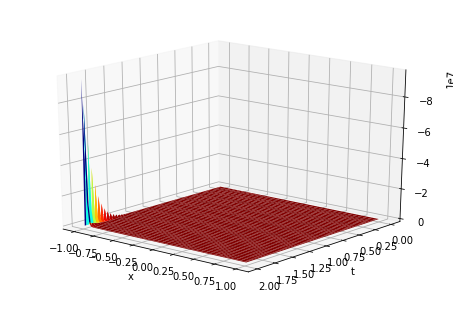

In [88]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def mu1(t):#
    return np.exp(-1)
def mu2(t):
    return np.exp(-1)
def mu3(x):
    return np.exp(-2)
def mu4(x):
    return 0

N = 100
M = 100
x1, x2 = -1, 1
t1, t2 = 0, 2

sigma=1/4
h = (x2-x1)/N
tau = (t2-t1)/M

u = np.zeros((M,N+1))
# a = 1
sig = (tau**2)/(h**2)
for m in range(M):
    u[m][0]= mu1(tau*m)
    u[m][N]= mu2(tau*m)

for n in range(N+1):
    u[0][n] = mu3(n*h)
# for n in range(1,N):
    u[1][n] = mu3(n*h)+tau*mu4(n*h) # см.Калиткин том 2, стр 243

A = sigma *sig
B = A
C = 1 + 2*A
alpha=np.zeros(N);
beta=np.zeros(N);
alpha[0]=1
beta[0]=0
for m in range(2,M):
    for n in range(1,N):
        G = (sigma*(u[m-1][n-1]-2*u[m-1][n]+u[m-1][n+1]))/(h**2)+((1-2*sigma)*(u[m][n-1]-2*u[m][n]+u[m][n+1]))/(h**2)
        F = -(tau**2 * G + 2*u[m][n]-u[m-1][n])
        alpha[n]=B/(C-A*alpha[n-1]);
        beta[n]=(A*beta[n-1]+F)/(C-A*alpha[n-1]);

    for n in range(N-1, 0, -1):
        u[m][n] = alpha[n]*u[m][n+1] + beta[n]
X, Y = np.meshgrid([x1 + n*h for n in range(N+1)], [t1 + m*tau for m in range(M)])
fig = plt.figure()
axes = Axes3D(fig)
axes.plot_surface(X, Y, u, cmap = cm.jet)
plt.ylabel('t')
plt.xlabel('x')
axes.view_init(200, 230)
plt.show()
fig.savefig('Лаба_7')